# Feature Engineering

- Feature engineering is a process of improving attributes and features. It is a non-written procedural way of selecting and transforming data features. It is indeed helpful to write more insights as well as visualising data clearly.
- It includes converting data and data types to convenient mode to retrieve useful information at any point during processing.


**Why do we do Feature Engineering?**
- Improve the model performance.
- Set the input data compatible to process to the model.
- Increase the level of visualization to create more insights.


Download dataset from here: 
To open this link <a href='https://drive.google.com/file/d/10INCcv-t0yPcnHiz-diUYjsY_FxZe238/view?usp=sharing' title='Google Drive'> Click here

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Data loading

In [ ]:
df = pd.read_csv('/content/penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [ ]:
df.shape

(344, 17)

In [ ]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

### Remove unnecessary columns from null values.
Lets remove Comments

In [ ]:
df.drop('Comments',axis=1,inplace=True)

## Explanation of dataset
Lets understand what is our aim and data input:


In [ ]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

# Description of dataset: 
- Study Name
- Sample Number
- Species : Output to find (CATEGORICAL)
      -- Adelie Penguin (Pygoscelis adeliae)
      -- Chinstrap penguin (Pygoscelis antarctica)
      -- Gentoo penguin (Pygoscelis papua)
- Region: Anvers (all the data is from this region)
- Island : Biscoe, Dream, Torgersen (penguins Location probably)
- Stage: Adult 1, Egg stage
- Clutch Completion: Is the study done with full clutch (2 eggs)
      -- Yes
      -- No
- Individual ID
- Date Egg
- Culmen Length : Length of beak (Refer fig.)
- Culmen Depth : Depth of beak (Refer fig.)
- Flipper Length : Length of hand (Refer fig.)
- Body Mass
- Sex
- Delta 15 N
- Delta 13 C

# Data Cleaning

- We have Region, Stage single unique value. Lets take them.
- We dont require Individual ID, Sample ID, study name, Date Egg. Lets take them out too. 
- We shall remove the null data.
- We shall change the column names for easy access.

In [ ]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [ ]:
df.drop(['Region','Sample Number','studyName','Stage','Individual ID','Date Egg'],axis=1,inplace=True)

In [ ]:
df.shape

(344, 10)

In [ ]:
df.rename(columns={'Culmen Length (mm)':'Culmen Length','Culmen Depth (mm)':'Culmen Depth', 'Flipper Length (mm)':'Flip Length', 'Body Mass (g)':'BM','Delta 15 N (o/oo)':'Delta15', 'Delta 13 C (o/oo)':'Delta13'},inplace=True)

In [ ]:
df.columns

Index(['Species', 'Island', 'Clutch Completion', 'Culmen Length',
       'Culmen Depth', 'Flip Length', 'BM', 'Sex', 'Delta15', 'Delta13'],
      dtype='object')

In [ ]:
df.isnull().sum()

Species               0
Island                0
Clutch Completion     0
Culmen Length         2
Culmen Depth          2
Flip Length           2
BM                    2
Sex                  10
Delta15              14
Delta13              13
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(325, 10)

# Data preprocessing

- Lets encode our data to make it feasible for the model
- Lets plot the data and see the outliers
- Correlation
- Covariance for numerical data.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 343
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            325 non-null    object 
 1   Island             325 non-null    object 
 2   Clutch Completion  325 non-null    object 
 3   Culmen Length      325 non-null    float64
 4   Culmen Depth       325 non-null    float64
 5   Flip Length        325 non-null    float64
 6   BM                 325 non-null    float64
 7   Sex                325 non-null    object 
 8   Delta15            325 non-null    float64
 9   Delta13            325 non-null    float64
dtypes: float64(6), object(4)
memory usage: 27.9+ KB


## We shall use Label Encoder for the Species feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['Species'] = lc.fit_transform(df['Species'])
df.head()

,Species,Island,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13
1,0,Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,0,Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,0,Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,0,Torgersen,Yes,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,0,Torgersen,No,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799


## We shall use map function for gender mapping.
0-Female ; 1-Male

In [ ]:
df['Sex'].value_counts()

FEMALE    163
MALE      161
.           1
Name: Sex, dtype: int64

In [ ]:
df['Sex'] = df['Sex'].map({'FEMALE':0,'MALE':1,'.':0})
df.head()

,Species,Island,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13
1,0,Torgersen,Yes,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454
2,0,Torgersen,Yes,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302
4,0,Torgersen,Yes,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426
5,0,Torgersen,Yes,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805
6,0,Torgersen,No,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799


## Lets use dummies option for clutch Completion

In [ ]:
df['Clutch Completion'] = pd.get_dummies(df['Clutch Completion'],drop_first=True)
df.head()

,Species,Island,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13
1,0,Torgersen,1,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454
2,0,Torgersen,1,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302
4,0,Torgersen,1,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426
5,0,Torgersen,1,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805
6,0,Torgersen,0,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799


## Lets use One Hot Encoding for the Island Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 
oe = ce.OneHotEncoder(handle_unknown='return_nan',return_df=True,use_cat_names=True) 
data = oe.fit_transform(df['Island'],drop_first=True)
df = pd.merge(df,data,left_index=True,right_index=True)
df.head()

,Species,Island,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13,Island_Torgersen,Island_Biscoe,Island_Dream
1,0,Torgersen,1,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454,1.0,0.0,0.0
2,0,Torgersen,1,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302,1.0,0.0,0.0
4,0,Torgersen,1,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426,1.0,0.0,0.0
5,0,Torgersen,1,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805,1.0,0.0,0.0
6,0,Torgersen,0,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799,1.0,0.0,0.0


## Lets drop Island_Dream and Island as well.



In [ ]:
df.drop(['Island','Island_Dream'],axis=1,inplace=True)

In [ ]:
df.head()

,Species,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13,Island_Torgersen,Island_Biscoe
1,0,1,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454,1.0,0.0
2,0,1,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302,1.0,0.0
4,0,1,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426,1.0,0.0
5,0,1,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805,1.0,0.0
6,0,0,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799,1.0,0.0


# Feature Scaling

### We feature the data to: <br>
    -- For easy calculation of Euclidean Distance in K-Means and KNN
    -- Get the maximum variance in Principal Component Analysis.
    -- Apply to process gradient descent in less time in ANN.
    -- Faster working in XGBoost 
    -- Easy identification of outliers in plots. 

Lets scale the data to bring to a convenient and suitable model using different scaling methods.

- We have here Flip Length and BM at different Scale. Lets bring them on scale from [-1,1] possible for easy processing of the model. 
- We have Culmen Length and Culmen Depth at different Scale.

## MinMaxScaler

The process of scaling down with the range inclusion is Normalization. 
Difference between Normalization and Standardization is that In Normalization, the difference or the range or the variance change will no be there. 


$ X(i)=(X(i)-mean(X))/(max(X)-min(X))$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df['Flip Length'] = mm.fit_transform(df[['Flip Length']])
df.head()

,Species,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13,Island_Torgersen,Island_Biscoe
1,0,1,39.5,17.4,0.237288,3800.0,0,8.94956,-24.69454,1.0,0.0
2,0,1,40.3,18.0,0.389831,3250.0,0,8.36821,-25.33302,1.0,0.0
4,0,1,36.7,19.3,0.355932,3450.0,0,8.76651,-25.32426,1.0,0.0
5,0,1,39.3,20.6,0.305085,3650.0,1,8.66496,-25.29805,1.0,0.0
6,0,0,38.9,17.8,0.152542,3625.0,0,9.18718,-25.21799,1.0,0.0


## Standard Scaler

The process of scaling the data using standard deviation is called Standardization. It groups the data to the origin reducing the variance.

$ X(i)=(X(i)-mean(X))/std(X) $

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['BM'] = sc.fit_transform(df[['BM']])
df.head()

,Species,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13,Island_Torgersen,Island_Biscoe
1,0,1,39.5,17.4,0.237288,-0.515098,0,8.94956,-24.69454,1.0,0.0
2,0,1,40.3,18.0,0.389831,-1.196116,0,8.36821,-25.33302,1.0,0.0
4,0,1,36.7,19.3,0.355932,-0.948473,0,8.76651,-25.32426,1.0,0.0
5,0,1,39.3,20.6,0.305085,-0.700830,1,8.66496,-25.29805,1.0,0.0
6,0,0,38.9,17.8,0.152542,-0.731785,0,9.18718,-25.21799,1.0,0.0


## Robust Scaler
The process of scaling the data using InterQuartileRange is Robust Scaling.

$ X(i)=(X(i)-median(X))/IQR(X) $

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['Culmen Length'] = rs.fit_transform(df[['Culmen Length']])
df['Culmen Depth'] = rs.fit_transform(df[['Culmen Depth']])
df.head()

,Species,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13,Island_Torgersen,Island_Biscoe
1,0,1,-0.586957,0.033333,0.237288,-0.515098,0,8.94956,-24.69454,1.0,0.0
2,0,1,-0.500000,0.233333,0.389831,-1.196116,0,8.36821,-25.33302,1.0,0.0
4,0,1,-0.891304,0.666667,0.355932,-0.948473,0,8.76651,-25.32426,1.0,0.0
5,0,1,-0.608696,1.100000,0.305085,-0.700830,1,8.66496,-25.29805,1.0,0.0
6,0,0,-0.652174,0.166667,0.152542,-0.731785,0,9.18718,-25.21799,1.0,0.0


## Maximum Absolute Scaler
The process of scaling the data using Maximum Absolute value is Max Absolute Scaling.

$ X(i)=(X(i))/max(X) $

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
ms = MaxAbsScaler()
df['Delta15'] = ms.fit_transform(df[['Delta15']])
df['Delta13'] = ms.fit_transform(df[['Delta13']])
df.head()

,Species,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13,Island_Torgersen,Island_Biscoe
1,0,1,-0.586957,0.033333,0.237288,-0.515098,0,0.892685,-0.913985,1.0,0.0
2,0,1,-0.500000,0.233333,0.389831,-1.196116,0,0.834698,-0.937616,1.0,0.0
4,0,1,-0.891304,0.666667,0.355932,-0.948473,0,0.874426,-0.937292,1.0,0.0
5,0,1,-0.608696,1.100000,0.305085,-0.700830,1,0.864297,-0.936322,1.0,0.0
6,0,0,-0.652174,0.166667,0.152542,-0.731785,0,0.916387,-0.933359,1.0,0.0


# Exploratory Data Analysis



### Lets plot a few features and find some inferences!! 

In [ ]:
df.columns

Index(['Species', 'Clutch Completion', 'Culmen Length', 'Culmen Depth',
       'Flip Length', 'BM', 'Sex', 'Delta15', 'Delta13', 'Island_Torgersen',
       'Island_Biscoe'],
      dtype='object')

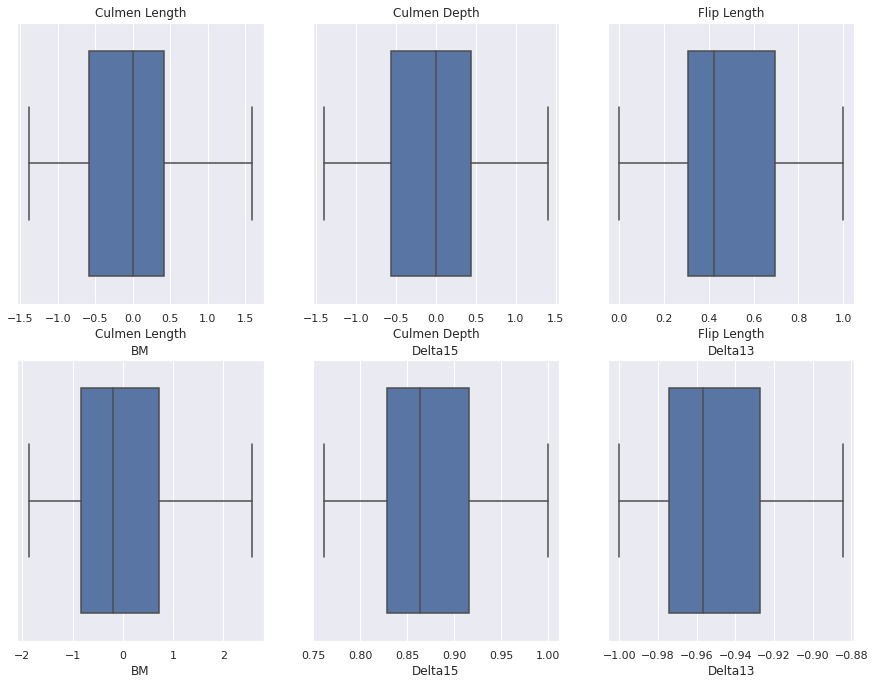

In [ ]:
df2 = df[['Culmen Length', 'Culmen Depth','Flip Length', 'BM', 'Delta15', 'Delta13']]
fig2 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df2):
  plt.subplot(5,3,i[0]+1)
  ax = sns.boxplot(i[1],data=df2).set(title='{}'.format(i[1]))
plt.show()

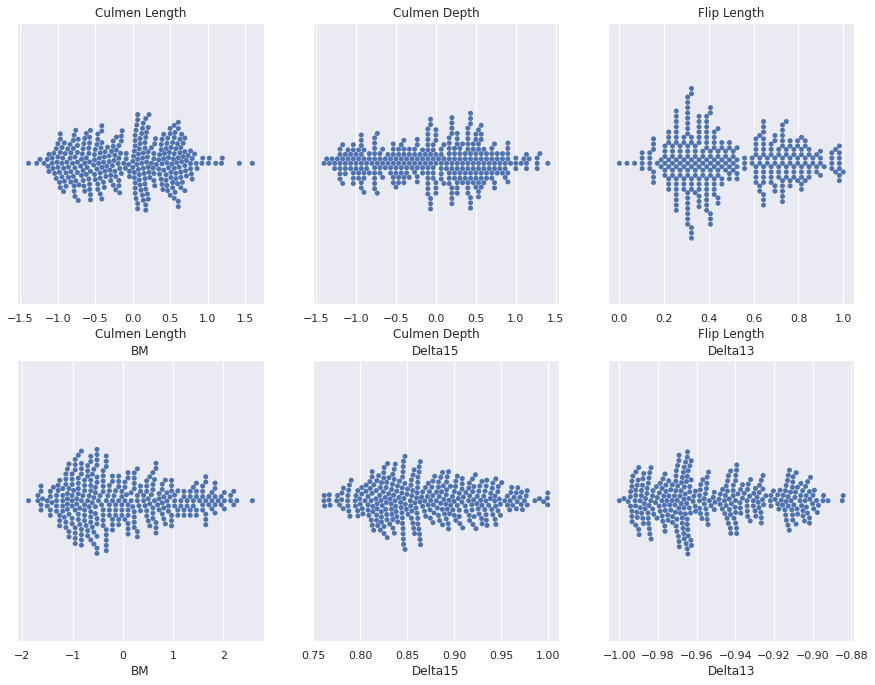

In [ ]:
fig5 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df2):
  plt.subplot(5,3,i[0]+1)
  ax = sns.swarmplot(i[1],data=df2).set(title='{}'.format(i[1]))
plt.show()

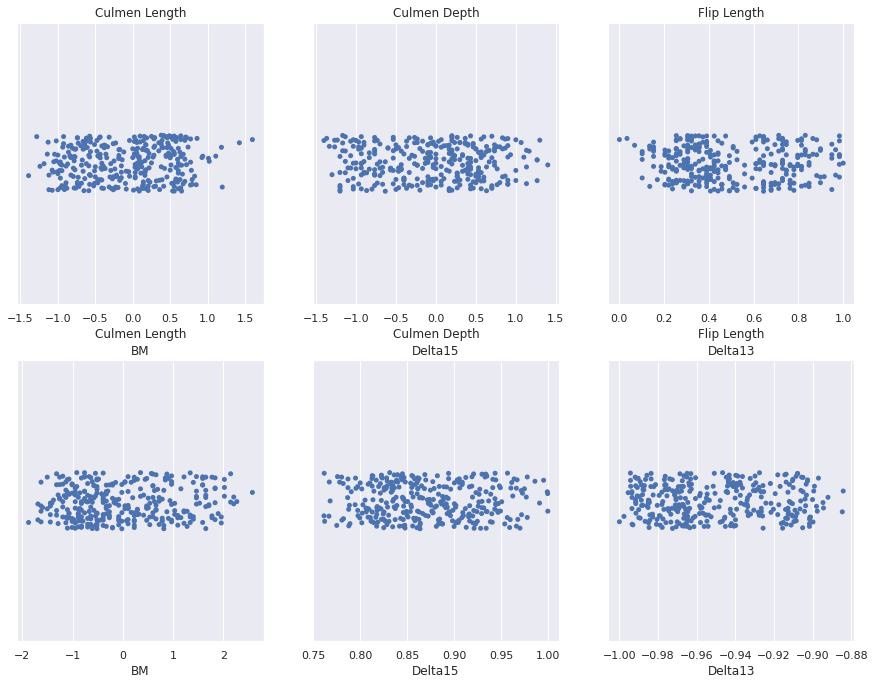

In [ ]:
fig2 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df2):
  plt.subplot(5,3,i[0]+1)
  ax = sns.stripplot(i[1],data=df2).set(title='{}'.format(i[1]))
plt.show()

In [ ]:
cols = list(set(df.columns) - set(df2.columns))
df1 = df[cols]

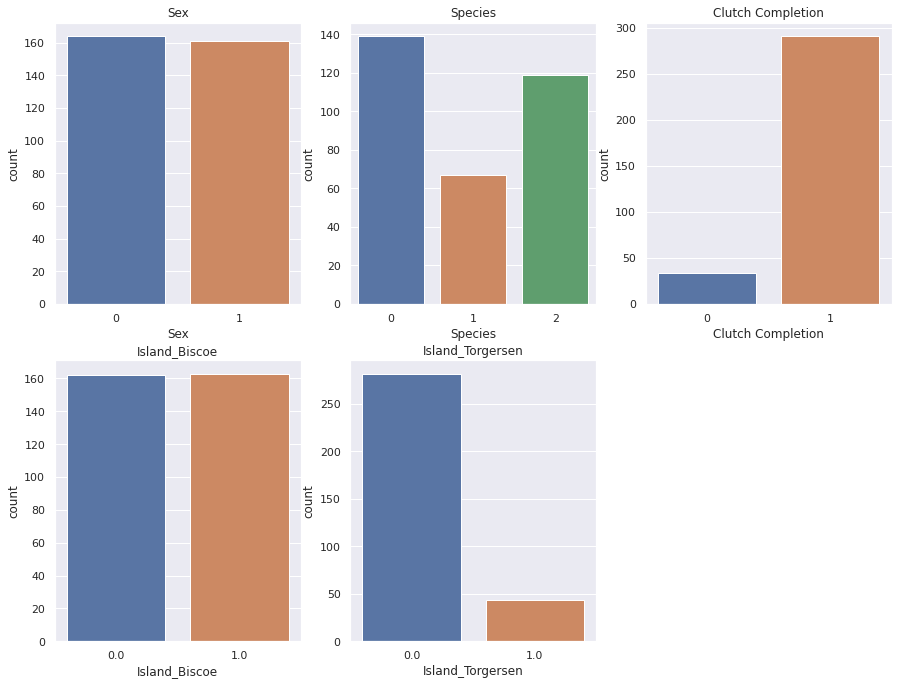

In [ ]:
fig3 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.countplot(i[1],data=df1).set(title='{}'.format(i[1]))
plt.show()

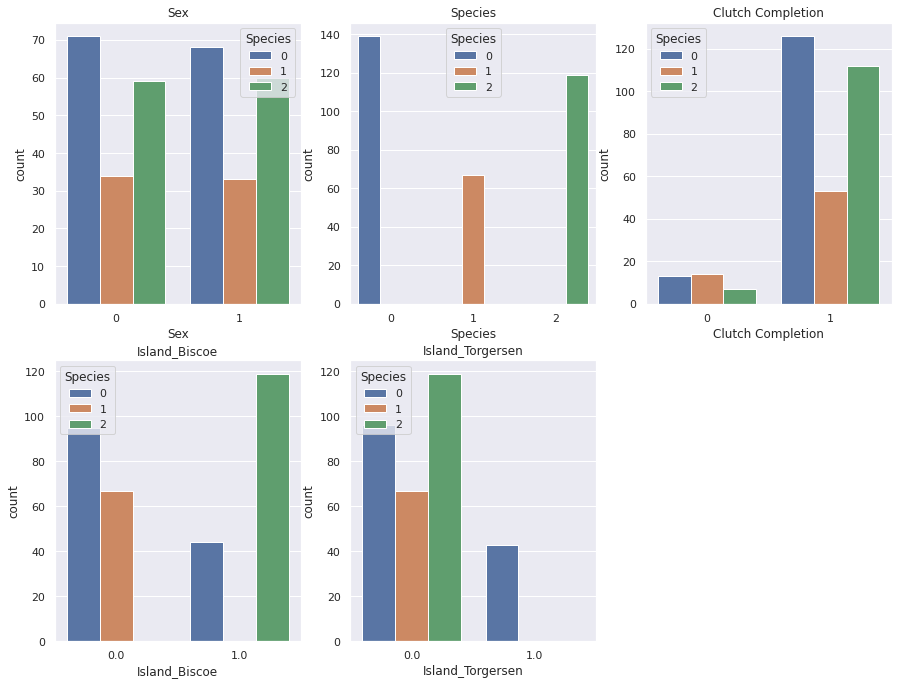

In [ ]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.countplot(i[1],data=df1,hue='Species').set(title='{}'.format(i[1]))
plt.show()

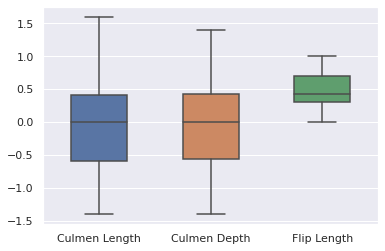

In [ ]:
df_new = df[['Culmen Length', 'Culmen Depth','Flip Length']]
sns.boxplot(data=df_new, width=0.5,fliersize=5)

In [ ]:
df3 = df[['Culmen Length', 'Culmen Depth', 'Flip Length', 'BM', 'Delta15','Delta13','Species']]

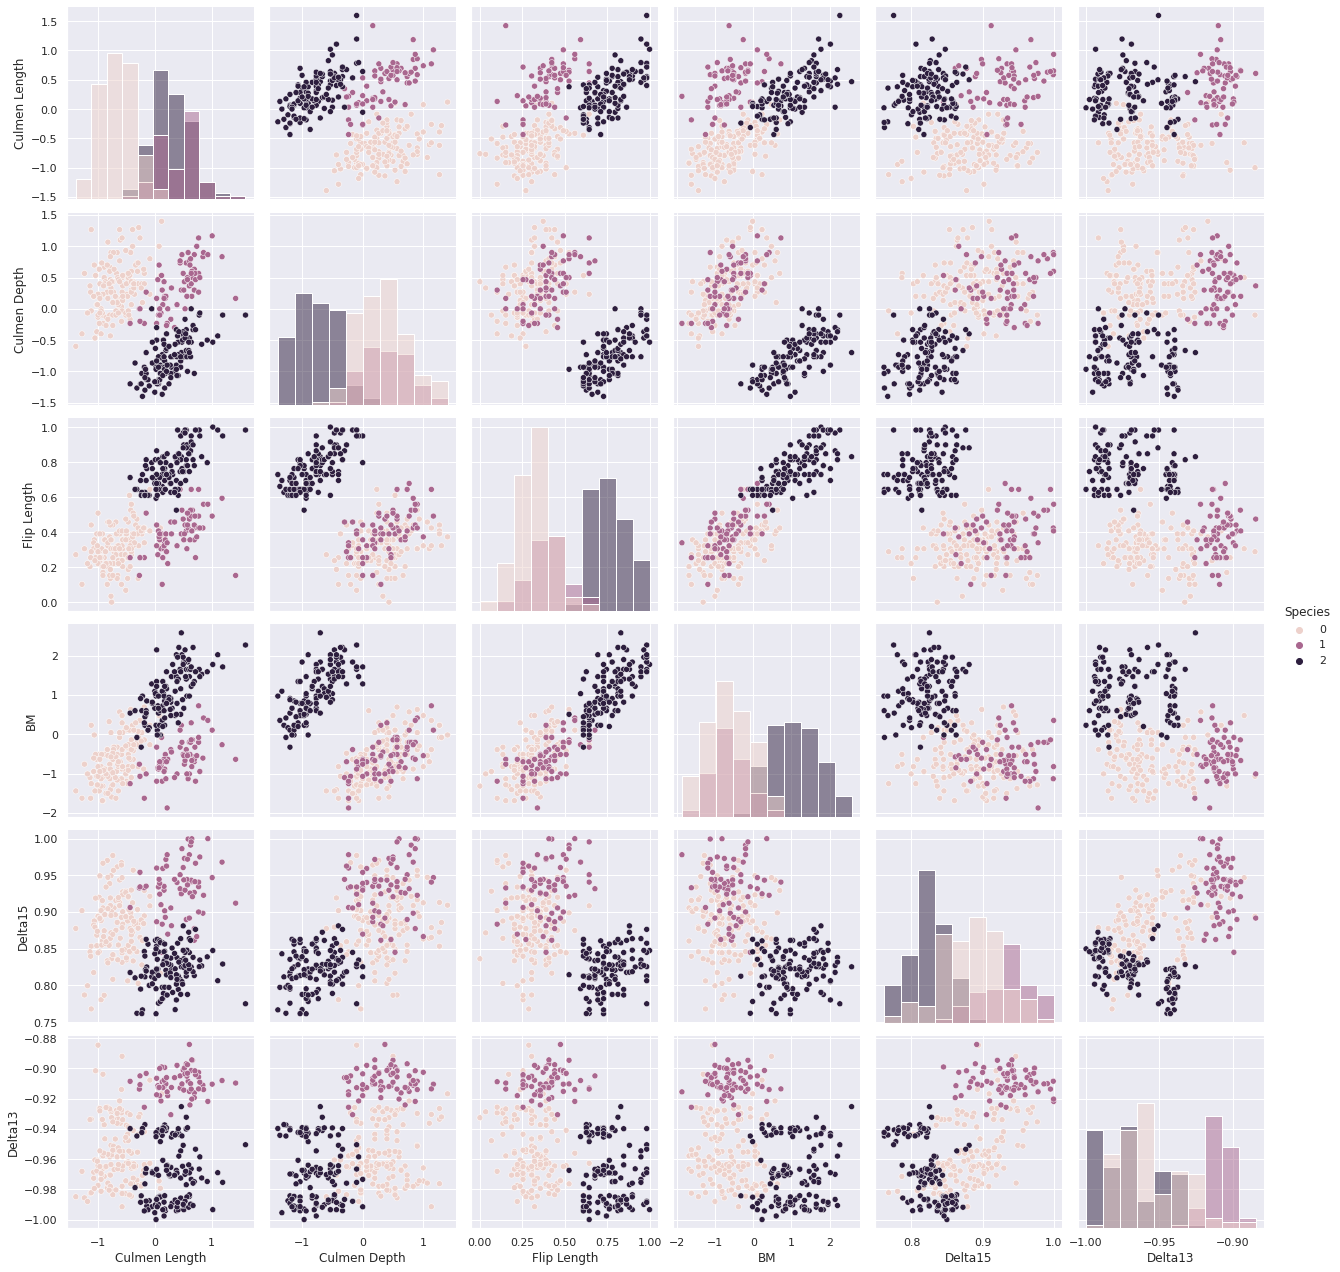

In [ ]:
sns.pairplot(df3, hue="Species", size=3,diag_kind="hist")

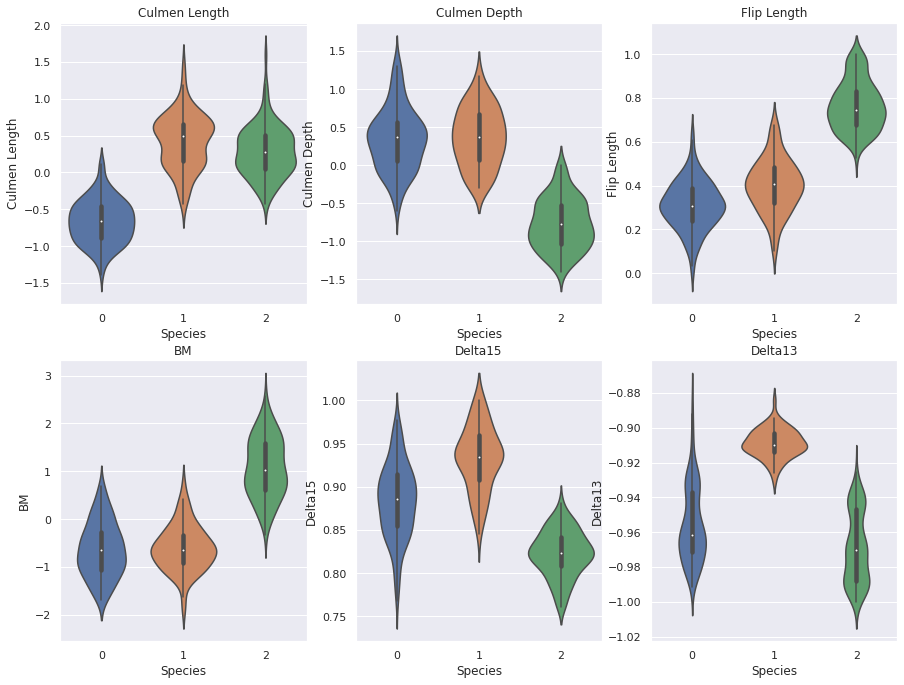

In [ ]:
fig2 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df2):
  plt.subplot(5,3,i[0]+1)
  ax = sns.violinplot(x='Species',y=i[1],data=df3).set(title='{}'.format(i[1]))
plt.show()

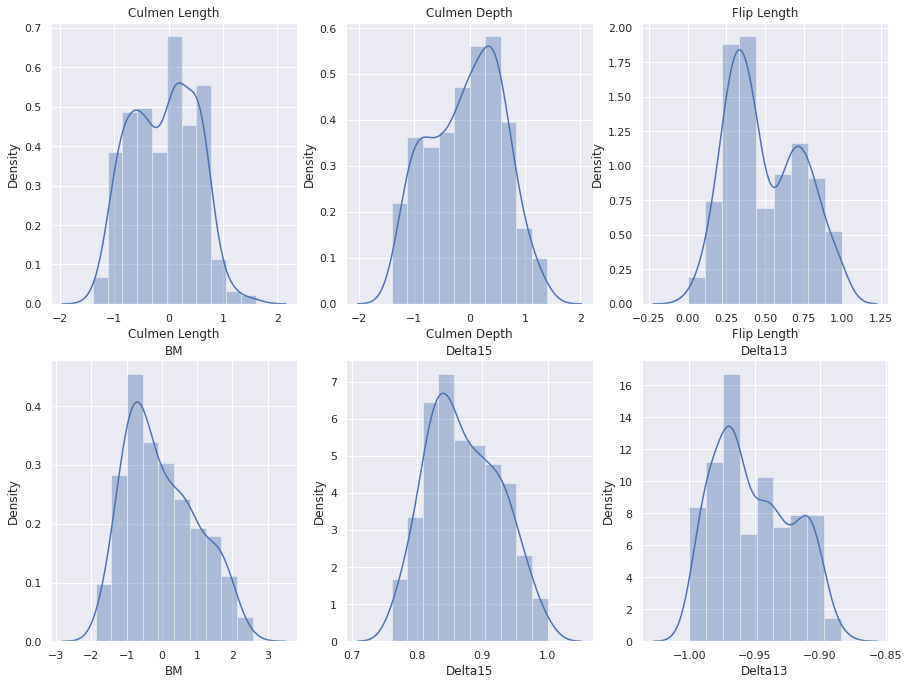

In [ ]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df2):
  plt.subplot(5,3,i[0]+1)
  ax = sns.distplot(df2[i[1]]).set(title='{}'.format(i[1]))
plt.show()

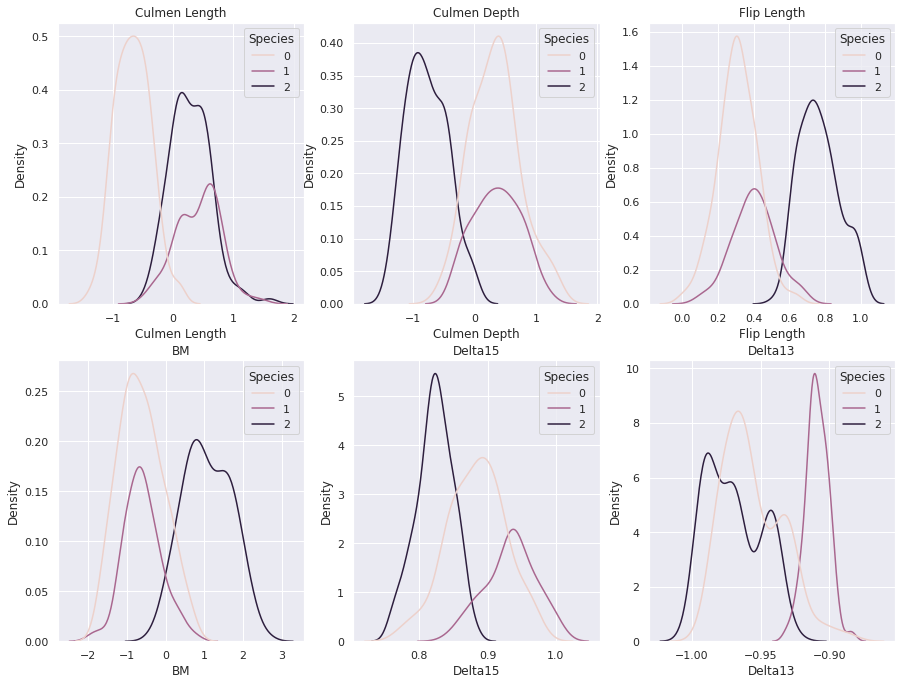

In [ ]:
fig2 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df2):
  plt.subplot(5,3,i[0]+1)
  ax = sns.kdeplot(i[1],hue='Species',data=df3).set(title='{}'.format(i[1]))
plt.show()

# Statistical Analysis

- Primary Statistical Analysis using describe()
- Lets also bring a few inference useful to our predictions.

In [ ]:
df.describe(include='all')

,Species,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13,Island_Torgersen,Island_Biscoe
count,325.000000,325.000000,325.000000,325.000000,325.000000,3.250000e+02,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.938462,0.895385,-0.091873,-0.058974,0.496010,-4.372571e-17,0.495385,0.871562,-0.950837,0.132308,0.501538
std,0.890223,0.306529,0.594807,0.655314,0.236688,1.001542e+00,0.500750,0.055118,0.029243,0.339347,0.500769
min,0.000000,0.000000,-1.391304,-1.400000,0.000000,-1.877135e+00,0.000000,0.761283,-1.000000,0.000000,0.000000
25%,0.000000,1.000000,-0.586957,-0.566667,0.305085,-8.246515e-01,0.000000,0.828124,-0.974368,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.423729,-2.055438e-01,0.000000,0.863606,-0.956826,0.000000,1.000000
75%,2.000000,1.000000,0.413043,0.433333,0.694915,7.231178e-01,1.000000,0.915691,-0.927519,0.000000,1.000000
max,2.000000,1.000000,1.597826,1.400000,1.000000,2.580441e+00,1.000000,1.000000,-0.884214,1.000000,1.000000


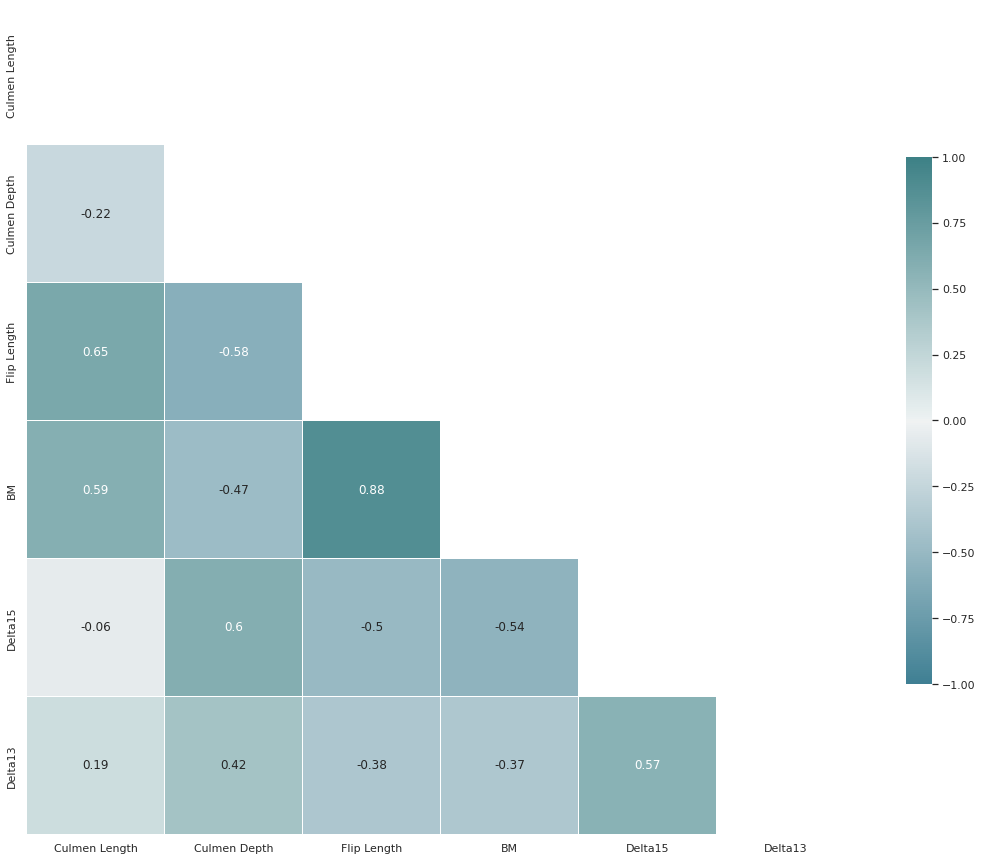

In [ ]:
corr = df2.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f1, ax1 = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Species,Clutch Completion,Culmen Length,Culmen Depth,Flip Length,BM,Sex,Delta15,Delta13,Island_Torgersen,Island_Biscoe
1,0,1,-0.586957,0.033333,0.237288,-0.515098,0,0.892685,-0.913985,1.0,0.0
2,0,1,-0.500000,0.233333,0.389831,-1.196116,0,0.834698,-0.937616,1.0,0.0
4,0,1,-0.891304,0.666667,0.355932,-0.948473,0,0.874426,-0.937292,1.0,0.0
5,0,1,-0.608696,1.100000,0.305085,-0.700830,1,0.864297,-0.936322,1.0,0.0
6,0,0,-0.652174,0.166667,0.152542,-0.731785,0,0.916387,-0.933359,1.0,0.0


# A few statistical tests to bring some inferences

### Is the Culmen Length and depth high in Females than Males?
### Do penguins in Torgersen Island have higher BM than Biscoe and Dream?
### Is Penguins with deliveries which mean clutch completion has higher BM than non clutch ones?
Let's get some conclusions for these!!! 

Consider alpha value=0.05 

- **For the first question above**, <br>
             Null Hypothesis: The Culmen Length and depth in Female higher than Males.
             Alternate Hypothesis: The Culmen Length and depth differs by gender.



In [ ]:
df_ques1 = df[df['Culmen Length']>0.5]

In [ ]:
import scipy.stats
scipy.stats.ttest_ind(df_ques1[df_ques1['Sex']==1]['Culmen Length'],df_ques1[df_ques1['Sex']==0]['Culmen Length'])

Ttest_indResult(statistic=0.056376757195007225, pvalue=0.9552229653635085)

In [ ]:
value = scipy.stats.ttest_ind(df_ques1[df_ques1['Sex']==1]['Culmen Length'],df_ques1[df_ques1['Sex']==0]['Culmen Length'])
print(value)
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Ttest_indResult(statistic=0.056376757195007225, pvalue=0.9552229653635085)
Fail to reject the null hypothesis


In [ ]:
scipy.stats.ttest_ind(df_ques1[df_ques1['Sex']==1]['Culmen Depth'],df_ques1[df_ques1['Sex']==0]['Culmen Depth'])
value = scipy.stats.ttest_ind(df_ques1[df_ques1['Sex']==1]['Culmen Depth'],df_ques1[df_ques1['Sex']==0]['Culmen Depth'])
print(value)
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Ttest_indResult(statistic=-0.11319016781505331, pvalue=0.9102455050355078)
Fail to reject the null hypothesis


- **For the second question above**, <br>
             Null Hypothesis: BM is higher in Torgersen Island than the other two.
             Alternate Hypothesis: The BM differs the other way.

In [ ]:
df_ques2 = df[df['BM']>0.6]       #Sampling for the test, works best on the higher BM

In [ ]:
scipy.stats.f(df_ques2[df_ques2['Species']==0]['BM'],df_ques2[df_ques2['Species']==1]['BM'], df_ques2[df_ques2['Species']==2]['BM'])
value = scipy.stats.f_oneway(df_ques2[df_ques2['Species']==0]['BM'],df_ques2[df_ques2['Species']==1]['BM'], df_ques2[df_ques2['Species']==2]['BM'])
print(value)
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

F_onewayResult(statistic=2.9627809080112084, pvalue=0.05685259723279093)
Fail to reject the null hypothesis


- **For the third question above**, <br>
             Null Hypothesis: Penguins with clutch finish are higher weighed than the other.
             Alternate Hypothesis: the OTher way.

In [ ]:
scipy.stats.ttest_ind(df_ques2[df_ques2['Clutch Completion']==0]['BM'],df_ques1[df_ques1['Clutch Completion']==1]['BM'])
value = scipy.stats.ttest_ind(df_ques2[df_ques2['Clutch Completion']==0]['BM'],df_ques1[df_ques1['Clutch Completion']==1]['BM'])
print(value)
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Ttest_indResult(statistic=1.4050273300146958, pvalue=0.1655363470014624)
Fail to reject the null hypothesis


# Feature Importance and Feature Selection using ML algorithms

### Random Forest Regressor

In [ ]:
X = df.drop('Species',axis=1)
Y = df['Species']
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_depth= 10) 
rf.fit(X,Y)
Important_features = rf.feature_importances_
Important_features

array([5.31651899e-05, 1.42577368e-01, 2.31341259e-02, 7.53361636e-01,
       3.74842872e-03, 3.89413404e-04, 5.49707578e-03, 4.19091269e-02,
       4.08430378e-03, 2.52453559e-02])

In [ ]:
columns = X.columns
feature_importance = pd.DataFrame(Important_features)
feature_importance['columns'] = columns.T

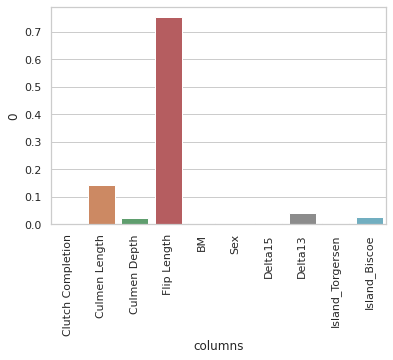

In [ ]:
sns.set_style('whitegrid')
sns.barplot(data=feature_importance,x='columns',y=feature_importance[0])
plt.xticks(rotation=90)
plt.show()

## Feature Importance using Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X,Y)
Important_features_tree = dtree.feature_importances_
Important_features_tree

array([0.        , 0.35917745, 0.06174006, 0.51814453, 0.        ,
       0.        , 0.0137253 , 0.03809067, 0.00912199, 0.        ])

In [ ]:
columns = X.columns
feature_importance_tree = pd.DataFrame(Important_features_tree)
feature_importance_tree['columns'] = columns.T

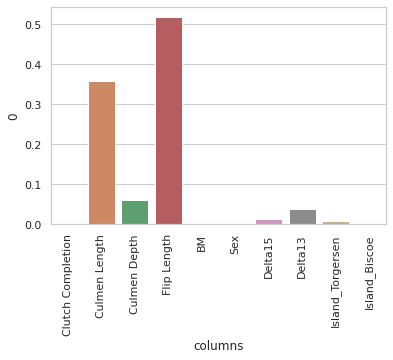

In [ ]:
sns.set_style('whitegrid')
sns.barplot(data=feature_importance_tree,x='columns',y=feature_importance_tree[0])
plt.xticks(rotation=90)
plt.show()